In [1]:
# variaveis para atualizar
trimestre = 'idoso_Inf_0_100_Clusters';
descricao = "Infodemics"
# 12_17  2
# 18_64  3
# 65_69  4
# 70_74  5
# 75_79  6
# 80_    7
#nomeimag = 'Fx_Et'
nomeimag = 'idoso'
metodo = 'average'

# metodos aglomerativos mais comuns - average, centroid, complete, single, ward
#codigo 15

In [2]:
# fazendo o dendrograma - planilha mais atual 15/11/2021 - por trimestre

from scipy.spatial.distance import pdist, squareform
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\mpenh\Anaconda3\lib\site-packages\scipy\__init__.py:149: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.16.2
  UserWarning)


In [3]:
#cluster com dendrograma
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [4]:
#df = pd.read_excel("databases/electionDatabase.xlsx")
df = pd.read_excel("F:/basenova/7basenova/vacinataxaInfodemia_0_100.xlsx")

In [5]:
#df

In [6]:
listaEstado = ['AC','AL','AM','AP','BA','CE','DF','ES','GO','MA','MG','MS','MT','PA','PB','PE','PI','PR','RJ','RN','RO','RR','RS','SC','SE','SP','TO']
dadosT = df

# 12_17 
# 18_64 
# 65_69 
# 70_74 
# 75_79 
# 80_

# choosing the variables
#columns = ['uf','18_64', 'medCasosNovos', 'medObitosNovos', 'densblf', 'denstm', 'infodemia']

# choosing the variables ALL
#columns = ['uf', '12_17', '18_64', '65_69', '70_74', '75_79','80_', 'medCasosNovos', 'medObitosNovos', 'densblf', 'denstm', 'infodemia']

# choosing the variables ALL

# IDOSOS
columns = ['uf', '65_69', '70_74', '75_79','80_', 'medCasosNovos', 'medObitosNovos', 'densblf', 'denstm', 'infodemia']


dadosT = pd.DataFrame(dadosT, columns = columns)

In [7]:
#dadosT

In [8]:
estados = dadosT.iloc[:,0].to_list()
movements = dadosT.drop(dadosT.columns[0], axis=1)

In [9]:
movements

,65_69,70_74,75_79,80_,medCasosNovos,medObitosNovos,densblf,denstm,infodemia
0,1718.224200,1196.350912,762.462687,762.686283,11.14,0.25,2.78,60.36,10.391289
1,2606.769479,1912.522083,1268.848408,1390.374523,7.23,0.21,1.49,55.55,44.861542
2,1679.629366,1129.401856,708.722123,784.844217,20.25,0.74,0.66,48.70,35.616326
3,1528.012597,972.297809,683.590690,701.576865,18.95,0.35,2.49,63.05,24.362656
4,2683.389064,2117.987756,1517.865886,1986.593470,10.17,0.24,2.34,58.94,28.826581
5,2413.894783,1651.423740,1348.172541,1781.464734,18.30,0.44,3.23,57.15,42.069339
6,2770.372247,2010.409312,1306.810241,1557.239925,734.55,18.76,20.75,131.70,100.000000
7,3531.377059,2403.020434,1536.619118,1942.347194,26.14,0.56,6.20,79.08,51.337581
8,2940.069220,2044.397023,1329.197558,1425.577139,14.11,0.39,5.58,80.08,49.467112
9,2074.425006,1623.197825,1079.793967,1409.355806,4.25,0.15,1.15,47.23,28.341762


In [10]:
# 1) problema/dados
# 2) tratamento dados, padronização
# 3) coeficiente de semelhança - medida de dissimilaridade (euclidiana)
# 4) processo de aglomeração (ward, average) - dendrograma
#    E k-means (gráfico do cotovelo) para estimar k grupos
#    CCC - Coef. Corr. Cofenética (maior que 0,7)
# 5) análises

In [11]:
# 2) tratamento dados, padronização

scaler = StandardScaler()
movements = scaler.fit_transform(movements)


In [12]:
# 3) coeficiente de semelhança - medida de dissimilaridade (euclidiana)

mat = pdist(movements, 'euclid')
matDistancias = squareform(mat)

In [13]:
matDistanciastabela = pd.DataFrame(matDistancias,columns=listaEstado, index=listaEstado)

In [14]:
matDistanciastabela

,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
AC,0.000000,2.935340,1.447955,0.837499,3.739642,3.087145,10.821249,4.938737,3.660555,2.084918,...,5.468611,5.845554,4.077132,3.423959,0.927156,6.721339,4.867522,3.613058,6.554644,6.139778
AL,2.935340,0.000000,2.669614,3.123731,1.555667,1.031024,10.227856,2.666984,1.845111,1.340117,...,3.276380,4.059064,1.585579,2.152343,3.558317,4.432147,2.846619,1.285527,4.838693,3.327438
AM,1.447955,2.669614,0.000000,1.155615,3.847049,2.951066,10.894165,5.067951,3.815530,1.863200,...,5.711997,6.266139,3.838344,2.801697,1.350641,6.979020,5.002853,3.274113,7.082105,5.953055
AP,0.837499,3.123731,1.155615,0.000000,4.104387,3.258418,10.662881,5.161262,3.796105,2.377251,...,5.773729,6.195153,4.150270,3.107243,1.003581,7.110108,5.046763,3.583479,6.974464,6.332252
BA,3.739642,1.555667,3.847049,4.104387,0.000000,1.240806,10.278434,2.203295,2.131258,2.098534,...,2.607483,3.221807,1.595425,3.406596,4.486208,3.457248,2.774943,2.104114,3.821801,2.823715
CE,3.087145,1.031024,2.951066,3.258418,1.240806,0.000000,9.993309,2.569269,1.923317,1.472057,...,3.182800,3.824142,1.307101,2.428700,3.769085,4.331548,2.843579,1.436801,4.585092,3.356683
DF,10.821249,10.227856,10.894165,10.662881,10.278434,9.993309,0.000000,9.119977,9.133166,10.785908,...,9.249797,8.675403,9.679753,9.436059,11.274035,9.943710,8.867213,9.530894,9.417267,9.983513
ES,4.938737,2.666984,5.067951,5.161262,2.203295,2.569269,9.119977,0.000000,1.509570,3.754929,...,0.979215,1.774196,2.021214,3.430119,5.743346,2.311217,1.121401,2.220791,2.596006,1.890457
GO,3.660555,1.845111,3.815530,3.796105,2.131258,1.923317,9.133166,1.509570,0.000000,2.849919,...,2.179667,2.829108,1.726553,2.269632,4.459923,3.657589,1.465363,1.359851,3.705849,2.997759
MA,2.084918,1.340117,1.863200,2.377251,2.098534,1.472057,10.785908,3.754929,2.849919,0.000000,...,4.315367,4.912196,2.517460,2.791980,2.600351,5.399725,3.914459,2.346974,5.629738,4.492841


In [15]:
# determinar a correlação cofenética

# metodos aglomerativos mais comuns - average, centroid, complete, single, ward
mergings = linkage(movements, method='average', metric='euclidean')

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(mergings, mat)
c

0.8898400016821699

In [16]:
# dataframe com as informações do LINKAGE - vai ser salvo em um arquivo excel
dfmer = pd.DataFrame(mergings)

In [17]:
dfmer

,0,1,2,3
0,9.0,13.0,0.715229,2.0
1,0.0,3.0,0.837499,2.0
2,4.0,15.0,0.860446,2.0
3,14.0,16.0,0.947974,2.0
4,21.0,28.0,0.965368,3.0
5,12.0,20.0,0.968611,2.0
6,10.0,17.0,0.969987,2.0
7,19.0,24.0,1.016327,2.0
8,1.0,5.0,1.031024,2.0
9,7.0,33.0,1.099687,3.0


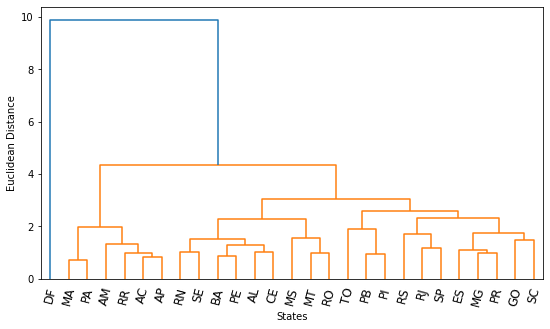

In [18]:
# set the fig size
fig= plt.figure(figsize=(9,5))

# Plot the dendrogram
Z = dendrogram(mergings,
           labels=estados,
           leaf_rotation=75,
           leaf_font_size=12           
          )
#plt.title(f'Dendrograma {trimestre}  {descricao}')
plt.xlabel('States')
plt.ylabel('Euclidean Distance')

# salvar cada dendrograma
plt.savefig(f'F:/basenova/7basenova/{trimestre}_{nomeimag}_Dendrogram_{metodo}.png')
plt.show()

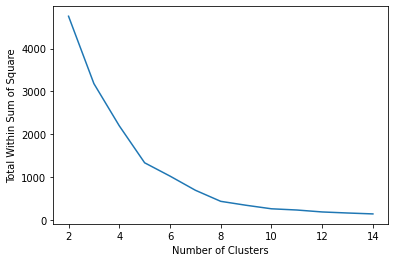

In [19]:
from sklearn.cluster import KMeans
wcss = []
 
for i in range(2, 15):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(mergings)
    #print i, kmeans.inertia_
    wcss.append(kmeans.inertia_)
    

valorwcss = wcss    
plt.plot(range(2, 15), wcss)
#plt.title(f'Metodo Elbow - Curva do Cotovelo - {trimestre}')
plt.xlabel('Number of Clusters')
plt.ylabel('Total Within Sum of Square') #within cluster sum of squares

plt.savefig(f'F:/basenova/7basenova/{trimestre}_{nomeimag}_Elbow_{metodo}.png')
plt.show()

In [20]:
from sklearn.cluster import KMeans
from math import sqrt

In [21]:
teste = []

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    teste = distances
    
    return distances.index(max(distances)) + 2

In [22]:
# calculando a quantidade ótima de clusters
n = optimal_number_of_clusters(wcss)
n

8

In [23]:
# criterio de numero de clusters
rotulos_k = fcluster(mergings, t = n, criterion='maxclust')

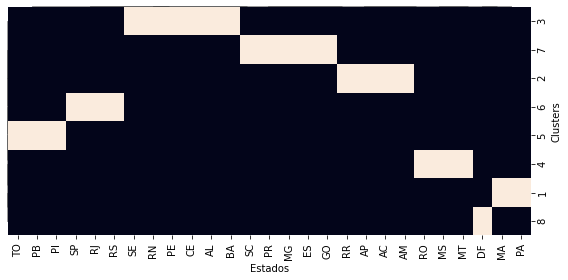

In [24]:
from scipy.cluster.hierarchy import fcluster

# Escolhendo o ponto de corte da nossa árvore do dendrograma
# Faça uma alteração nesse valor mudam os clusters
#labels = rotulos_dist 
labels = rotulos_k

# criando um dataframe com as labes e as empresas= df
dfCluster = pd.DataFrame({'Clusters': labels, 'Estados': estados})

# Criando uma crosstab: ct
ct = pd.crosstab(dfCluster['Clusters'], dfCluster['Estados'])

# transformando a crosstab em um cluster map
sns.clustermap(ct, figsize=(8, 4), cbar_pos = None,  dendrogram_ratio=(0.001))

#plt.title(f'Clustermap - {trimestre}')
plt.savefig(f'F:/basenova/7basenova/{trimestre}_{nomeimag}_Map_{metodo}.png')

In [25]:
dfmer = dfmer.append(pd.DataFrame(dfCluster))                          
dfmer = dfmer.append(pd.DataFrame(matDistanciastabela))

In [26]:
dfmer.to_excel(f'F:/basenova/7basenova/{trimestre}_{nomeimag}_{metodo}.xlsx', encoding='utf-8', index=False)

#dadosG.to_excel('F:/basenova/anatel/densTM2021_MediaAnual.xlsx', encoding='utf-8', index=False)